In [1]:
# Working with Time Series

# Timestamps -> particular time moment
# Time interval and periods -> length of time between 
# Time deltas or duration -> an exact length of time 

In [2]:
# Native Python Dates and Times: datetime and dateutil
from datetime import datetime 
datetime(year=2021, month=7, day=4)


datetime.datetime(2021, 7, 4, 0, 0)

In [3]:
from dateutil import parser 
date = parser.parse("4th of July, 2021")
date 

datetime.datetime(2021, 7, 4, 0, 0)

In [4]:
date.strftime("%A") # code for printing

'Sunday'

In [5]:
# Typed Arrays of Times: NumPy's datetime64
import numpy as np 
date = np.array("2021-07-04", dtype=np.datetime64)
date 

array('2021-07-04', dtype='datetime64[D]')

In [6]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [7]:
np.datetime64("2021-07-04")

numpy.datetime64('2021-07-04')

In [8]:
np.datetime64("2021-07-04 12:00")

numpy.datetime64('2021-07-04T12:00')

In [9]:
# запрос и установка фундаментальной единицы измерения времени 
# у нас это наносекунды
# (число 64 битное - и от фундаментальной единицы будет страдать точность)
np.datetime64("2021-07-04 12:59:59.50","ns")

numpy.datetime64('2021-07-04T12:59:59.500000000')

In [10]:
# Dates and Times in Pandas: The Best of Both Worlds
import pandas as pd 
date = pd.to_datetime("4th of July, 2021")
date 

Timestamp('2021-07-04 00:00:00')

In [11]:
date.strftime("%A")

'Sunday'

In [12]:
date + pd.to_timedelta(np.arange(12),"D")

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

In [13]:
# Pandas Time Series: Indexing by Time 
index = pd.DatetimeIndex([
    "2020-07-04","2020-08-04","2021-07-04","2021-08-04"
])
data = pd.Series([0,1,2,3], index=index)
data 

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [14]:
# так как у нас в итоге получилась серия с индеком из дат 
# мы теперь к ней можем делать запросы 
data["2020-07-04":"2021-07-04"]

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [15]:
data["2021"]

2021-07-04    2
2021-08-04    3
dtype: int64

In [16]:
# Pandas Time Series Data Structures 

# timestamps -> Timestamp -> DatetimeIndex 
# time periods -> Period > PeriodIndex 
# time deltas / durations -> Timedelta -> TimedeltaIndex 

In [17]:
# создадим DatetimeIndex из набора Timestamp:
dates = pd.to_datetime([
    datetime(2021,7,3), "4th of July, 2021", 
    "2021-Jul-6", "07-07-2021", "20210708"
])
dates 

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [18]:
# преобразуем тип хранения к оперированию в днях
dates.to_period("D")

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [19]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [20]:
# Regular Sequence: pd.data_range
pd.date_range("2015-07-03","2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range("2015-07-03",periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range("2015-07-03",periods=8, freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
pd.period_range("2015-07", periods=8, freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [24]:
pd.timedelta_range(0, periods=6, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [25]:
# Frequencies and Offsets 
# для этого используется специальный код - указываемый в параметре freq
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [26]:
# период в бизнес днях (BDay):
from pandas.tseries.offsets import BDay 
pd.date_range("2015-07-01", periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

In [38]:
# Resampling, Shifting and Windowing
import yfinance as yf
import pandas as pd

data = yf.download('^GSPC', start='2018-01-01', end='2024-03-22')
sp500 = pd.DataFrame(data)
print(sp500.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                Volume  
Date                    
2018-01-02  3397430000  
2018-01-03  3544030000  
2018-01-04  3697340000  
2018-01-05  3239280000  
2018-01-08  3246160000  


In [39]:
sp500 = sp500["Close"]

/tmp/ipykernel_413486/3975813553.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Axes: xlabel='Date'>

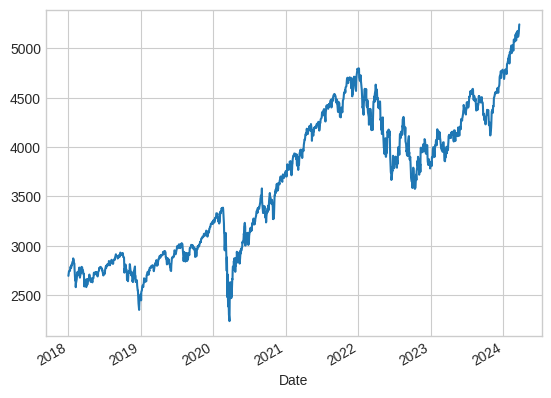

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
sp500.plot()

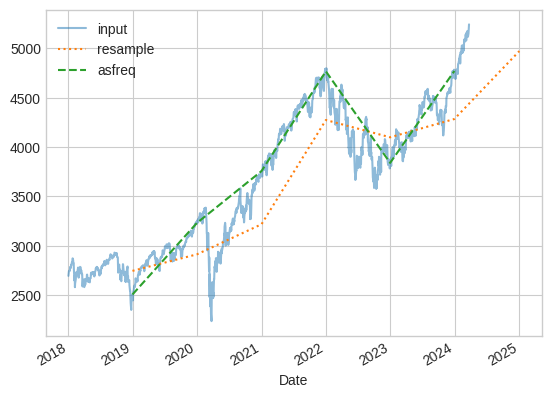

In [41]:
# Resampling and Converting Frequencies 
# "resample" reports the "average" of the per year, 
# while "asfreq" reports the "value" at the end of the year 

sp500.plot(alpha=0.5, style="-")
sp500.resample("BA").mean().plot(style=":")
sp500.asfreq("BA").plot(style="--");
plt.legend(["input","resample","asfreq"], loc="upper left");

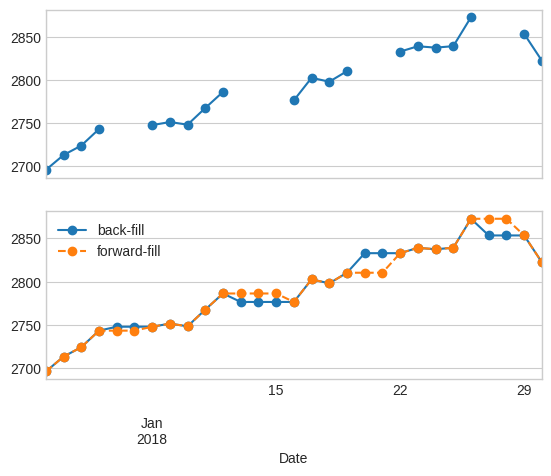

In [42]:
fig, ax = plt.subplots(2,sharex=True)
data = sp500.iloc[:20]
data.asfreq("D").plot(ax=ax[0], marker="o")

data.asfreq("D", method="bfill").plot(ax=ax[1], style="-o")
data.asfreq("D", method="ffill").plot(ax=ax[1], style="--o")
ax[1].legend(["back-fill","forward-fill"])

Text(0, 0.5, '% Returns of Investment after 1 year')

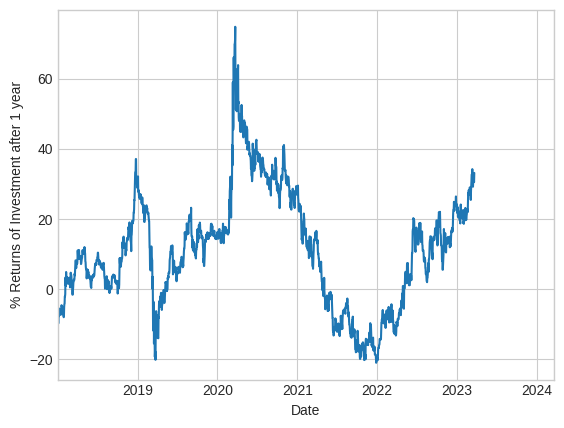

In [43]:
# Time Shifts 
sp500 = sp500.asfreq("D",method="pad")

ROI = 100 * (sp500.shift(-365) - sp500) / sp500 
ROI.plot()
plt.ylabel("% Returns of Investment after 1 year")

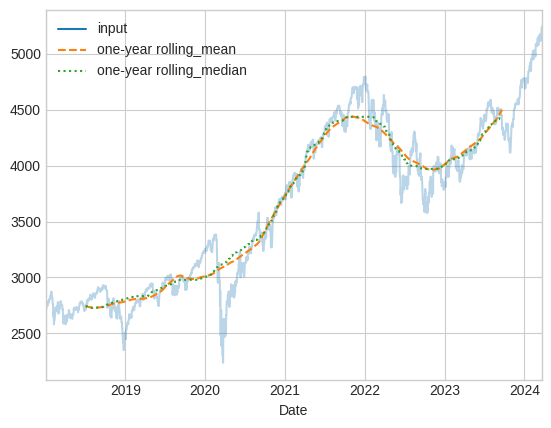

In [44]:
# Rolling Windows 
rolling = sp500.rolling(365, center=True)
data = pd.DataFrame({
    "input":sp500,
    "one-year rolling_mean": rolling.mean(),
    "one-year rolling_median":rolling.median()
})
ax = data.plot(style=['-',"--",":"])
ax.lines[0].set_alpha(0.3)